In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data_train = pd.read_csv('/content/train_Df64byy.csv')
data_test = pd.read_csv('/content/test_YCcRUnU.csv')

In [ ]:
data_train.shape , data_test.shape

((50882, 14), (21805, 13))

In [ ]:
data_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
data_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [ ]:
data_train.Accomodation_Type.unique()

array(['Rented', 'Owned'], dtype=object)

In [ ]:
features_train = data_train.columns[1:-1]
features_test = data_test.columns[1:]

print('Number of features in train set : ',len(features_train))
print('Number of features in test set : ',len(features_test))

Number of features in train set :  12
Number of features in test set :  12


In [ ]:
data_train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [ ]:
unique_levels_count_train = []
for col in features_train :
  unique_levels_count_train.append(len(data_train[col].unique()))


data_unique_count_train = dict(zip(features_train,unique_levels_count_train))
data_train_unique_count_df = pd.DataFrame(data_unique_count_train,index=[0])
data_train_unique_count_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,36,5316,2,2,58,60,2,10,16,5,22,6977


In [ ]:
unique_levels_count_test = []
for col in features_test :
  unique_levels_count_test.append(len(data_test[col].unique()))


data_unique_count_test = dict(zip(features_test,unique_levels_count_test))
data_test_unique_count_df = pd.DataFrame(data_unique_count_test,index=[0])
data_test_unique_count_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,36,4694,2,2,58,60,2,10,16,5,22,5226


In [ ]:
unique_levels_train = []

for col in features_train :
  unique_levels_train.append(data_train[col].unique())


data_train_unique_levels = dict(zip(features_train,unique_levels_train))
data_train_unique_levels


{'Accomodation_Type': array(['Rented', 'Owned'], dtype=object),
 'City_Code': array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
        'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
        'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
        'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object),
 'Health Indicator': array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
       dtype=object),
 'Holding_Policy_Duration': array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
        '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object),
 'Holding_Policy_Type': array([ 3., nan,  1.,  4.,  2.]),
 'Is_Spouse': array(['No', 'Yes'], dtype=object),
 'Lower_Age': array([36, 22, 32, 48, 44, 52, 28, 73, 43, 26, 21, 47, 66, 20, 27, 34, 55,
        23, 18, 25, 24, 56, 35, 63, 64, 67, 75, 42, 71, 68, 31, 19, 65, 54,
        33, 74, 30, 69, 29, 62, 58, 39, 60, 57, 41, 40, 45, 37, 51, 59, 49,

In [ ]:
unique_levels_test = []

for col in features_test :
  unique_levels_test.append(data_test[col].unique())


data_test_unique_levels = dict(zip(features_test,unique_levels_test))
data_test_unique_levels

{'Accomodation_Type': array(['Owned', 'Rented'], dtype=object),
 'City_Code': array(['C1', 'C4', 'C3', 'C2', 'C13', 'C18', 'C16', 'C17', 'C11', 'C7',
        'C21', 'C34', 'C14', 'C8', 'C12', 'C6', 'C10', 'C9', 'C23', 'C32',
        'C26', 'C15', 'C24', 'C20', 'C19', 'C5', 'C28', 'C30', 'C25',
        'C29', 'C27', 'C33', 'C22', 'C36', 'C35', 'C31'], dtype=object),
 'Health Indicator': array([nan, 'X1', 'X3', 'X2', 'X5', 'X4', 'X7', 'X6', 'X9', 'X8'],
       dtype=object),
 'Holding_Policy_Duration': array(['6.0', '3.0', '2.0', nan, '14+', '5.0', '1.0', '4.0', '12.0',
        '11.0', '7.0', '9.0', '13.0', '8.0', '14.0', '10.0'], dtype=object),
 'Holding_Policy_Type': array([ 3.,  4., nan,  1.,  2.]),
 'Is_Spouse': array(['No', 'Yes'], dtype=object),
 'Lower_Age': array([30, 68, 28, 23, 75, 24, 56, 41, 22, 37, 38, 42, 31, 35, 44, 29, 60,
        54, 27, 71, 66, 36, 26, 47, 63, 45, 59, 67, 64, 57, 43, 46, 61, 25,
        70, 69, 65, 72, 55, 34, 21, 52, 19, 58, 33, 53, 49, 48, 40, 50, 39,

In [ ]:
data_train.Response.unique()

array([0, 1])

In [ ]:
data_train.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [ ]:
number_not_interested = data_train.Response.value_counts()[0]
number_interested = data_train.Response.value_counts()[1]
print('Number of people interested in policy is : ',number_interested )
print('Number of people not interested in policy is : ',number_not_interested )
print('Perecentage of people not interested in policy is : {} %'.format(round((number_not_interested/data_train.shape[0])*100,3)))
print('Perecentage of people interested in policy is : {} %'.format(round((number_interested/data_train.shape[0])*100,3)))

Number of people interested in policy is :  12209
Number of people not interested in policy is :  38673
Perecentage of people not interested in policy is : 76.005 %
Perecentage of people interested in policy is : 23.995 %


In [ ]:
data_train.select_dtypes(include=['object']).columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [ ]:
print('Categorical Features : ',list(data_train.select_dtypes(include=['object']).columns))
print('Continuous Features : ',list(data_train.select_dtypes(include=['float','int']).columns[1:-1]))

Categorical Features :  ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']
Continuous Features :  ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']


Dataset is imbalanced

In [ ]:
categorical_features_train = list(data_train.select_dtypes(include=['object']).columns)
print("Number of Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(data_train.select_dtypes(include=['float','int']).columns[1:-1])
print("Number of Continous features in Train data : {} features".format(len(continous_features_train)))

Number of Categorical features in Train data : 6 features
Number of Continous features in Train data : 6 features


In [ ]:
categorical_features_test = list(data_test.select_dtypes(include=['object']).columns)
print("Categorical features in Test data : {} features".format(len(categorical_features_test)))
continous_features_test = list(data_test.select_dtypes(include=['float','int']).columns[1:])
print("Continous features in Test data : {} features".format(len(continous_features_test)))

Categorical features in Test data : 6 features
Continous features in Test data : 6 features


In [ ]:
print('Null value in train data: ',data_train.isnull().sum().sum())
data_train.isnull().sum()

Null value in train data:  52193


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
print('Null value in test data: ',data_test.isnull().sum().sum())
data_test.isnull().sum()

Null value in test data:  22233


ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
print('Percentage of NaN in Health Indicator feature in train set is : {} %'.format(round(((data_train.isnull().sum()[8]/data_train.shape[0])*100),3)))
print('Percentage of NaN in Health Indicator feature in test set is : {} %'.format(round(((data_test.isnull().sum()[8]/data_test.shape[0])*100),3)))

Percentage of NaN in Health Indicator feature in train set is : 22.977 %
Percentage of NaN in Health Indicator feature in test set is : 23.054 %


In [ ]:
print('Percentage of NaN in Holding_Policy_Duration feature in train set is : {} %'.format(round(((data_train.isnull().sum()[9]/data_train.shape[0])*100),3)))
print('Percentage of NaN in Holding_Policy_Duration feature in test set is : {} %'.format(round(((data_test.isnull().sum()[9]/data_test.shape[0])*100),3)))

Percentage of NaN in Holding_Policy_Duration feature in train set is : 39.8 %
Percentage of NaN in Holding_Policy_Duration feature in test set is : 39.454 %


In [ ]:
print('Percentage of NaN in Holding_Policy_Type feature in train set is : {} %'.format(round(((data_train.isnull().sum()[10]/data_train.shape[0])*100),3)))
print('Percentage of NaN in Holding_Policy_Type feature in test set is : {} %'.format(round(((data_test.isnull().sum()[10]/data_test.shape[0])*100),3)))

Percentage of NaN in Holding_Policy_Type feature in train set is : 39.8 %
Percentage of NaN in Holding_Policy_Type feature in test set is : 39.454 %


In [ ]:
unique_in_categorical =[]
for i in categorical_features_train:
  unique_in_categorical.append(len(data_train[i].unique()))
data_cat = dict(zip(categorical_features_train,unique_in_categorical))

# A. Univariate Analysis : 

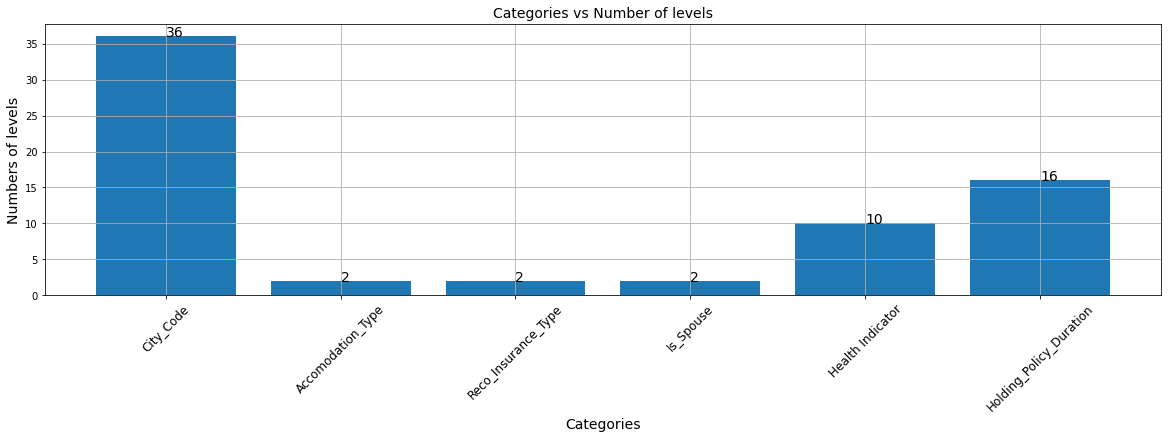

In [ ]:
'''
count plot for Categories Vs Number of Levels in each categories
'''
fig = plt.figure(figsize =(20, 5))
plt.bar(categorical_features_train,unique_in_categorical)
plt.xlabel('Categories',fontsize=14)
plt.ylabel('Numbers of levels',fontsize=14)
plt.title('Categories vs Number of levels',fontsize=14)
plt.xticks(rotation = 45,size = 12)
plt.grid()
for i in range(len(categorical_features_train)):
  plt.text(x = i , y = unique_in_categorical[i],s = unique_in_categorical[i],size = 14,rotation = 0)
plt.show()

In [ ]:
data_train['Health Indicator'].fillna('No Health Indicator',inplace = True)
data_train['Holding_Policy_Duration'].fillna('No Holding_Policy_Duration',inplace = True)
data_train['Holding_Policy_Type'] = data_train['Holding_Policy_Type'].replace(to_replace = np.nan,value = -1)

In [ ]:
data_train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

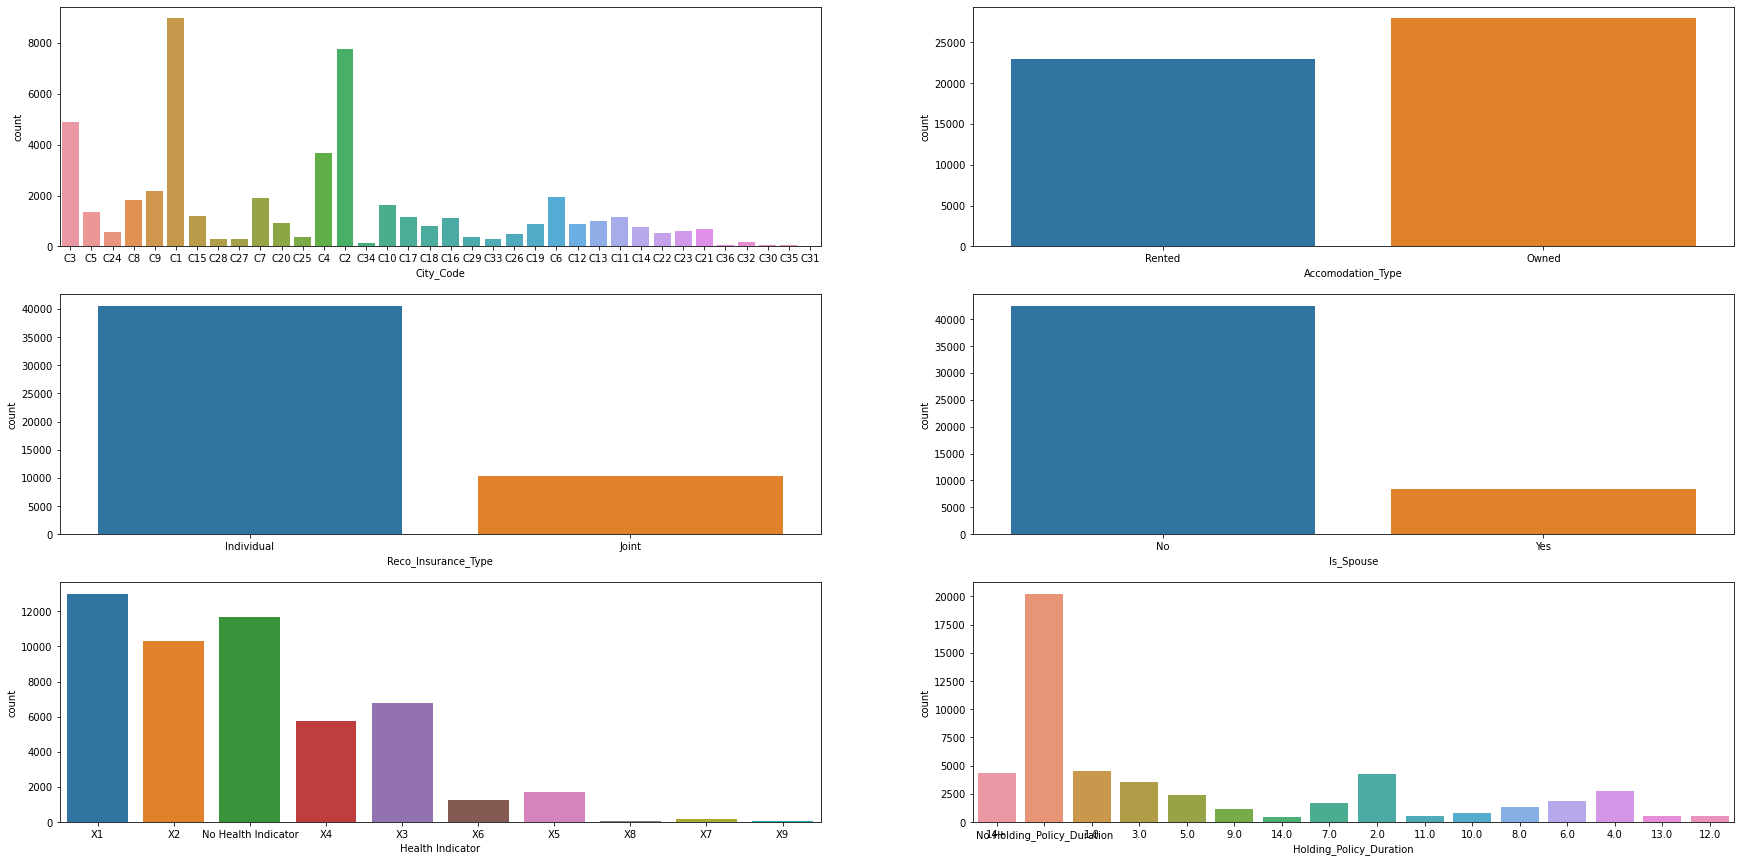

In [ ]:

fig= plt.subplots(figsize=(30,15))

for i,j in enumerate(categorical_features_train):
  plt.subplot(3,2,i+1)
  sns.countplot(data = data_train,x = j )



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


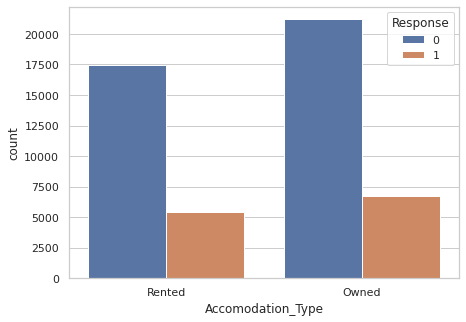

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
ax = sns.countplot('Accomodation_Type',hue = 'Response',data = data_train)

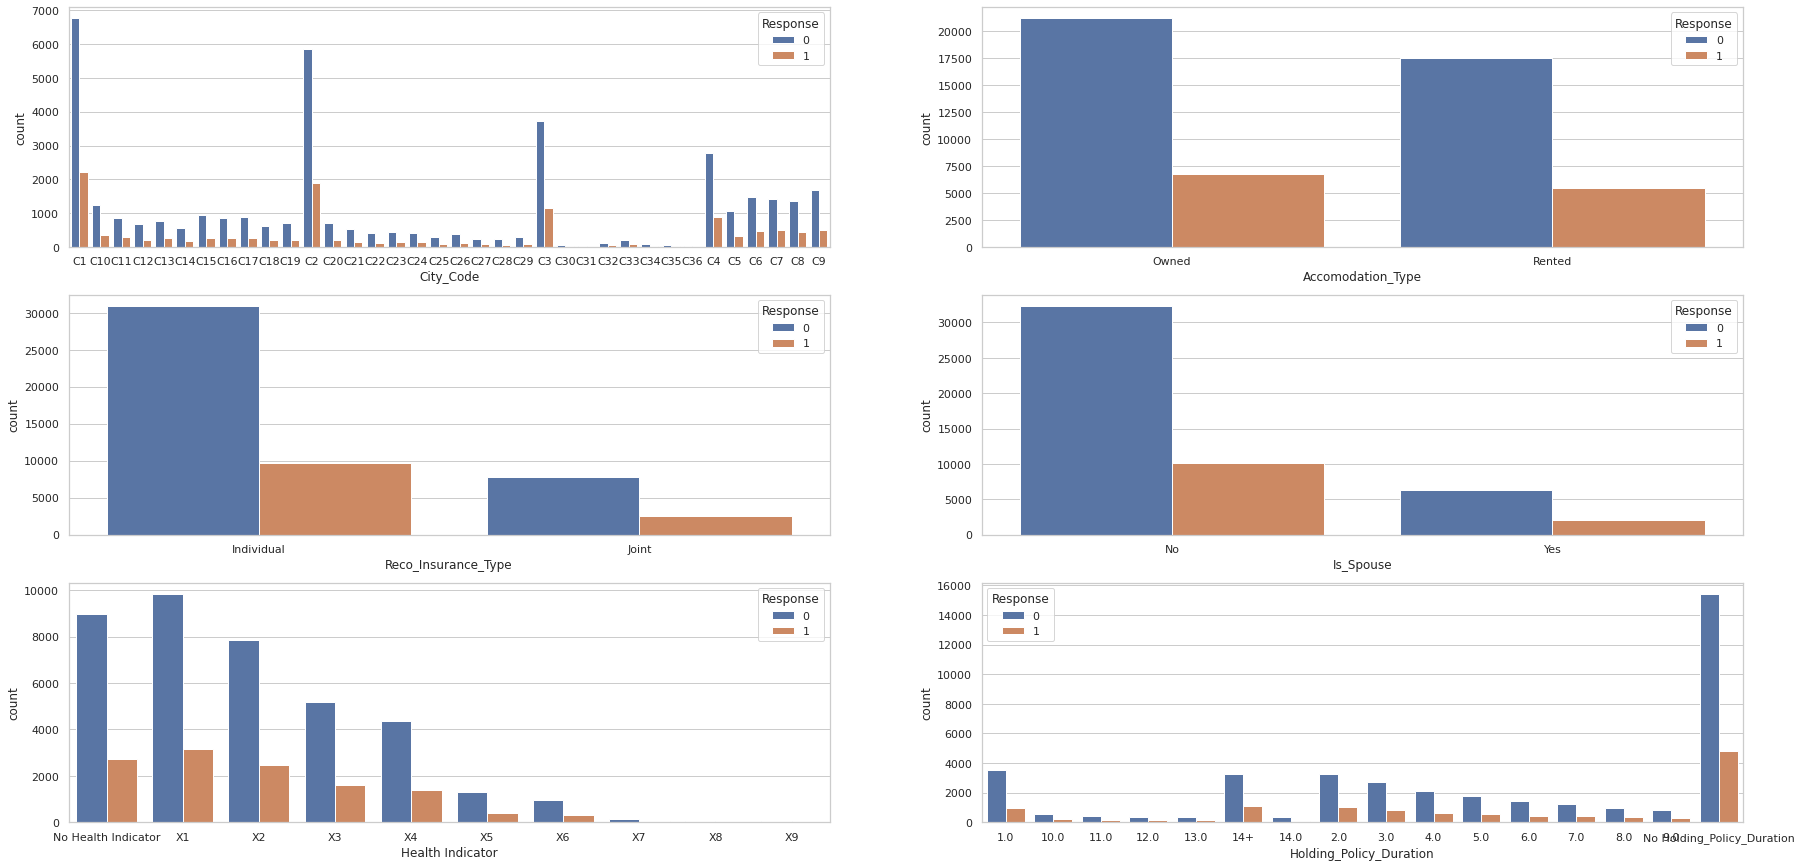

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,15))
for index, category in enumerate(categorical_features_train):
    plt.subplot(3 ,2, index + 1)

    order = sorted(data_train[category].unique())
    ax = sns.countplot(x = category, data=data_train, hue="Response", order=order,)



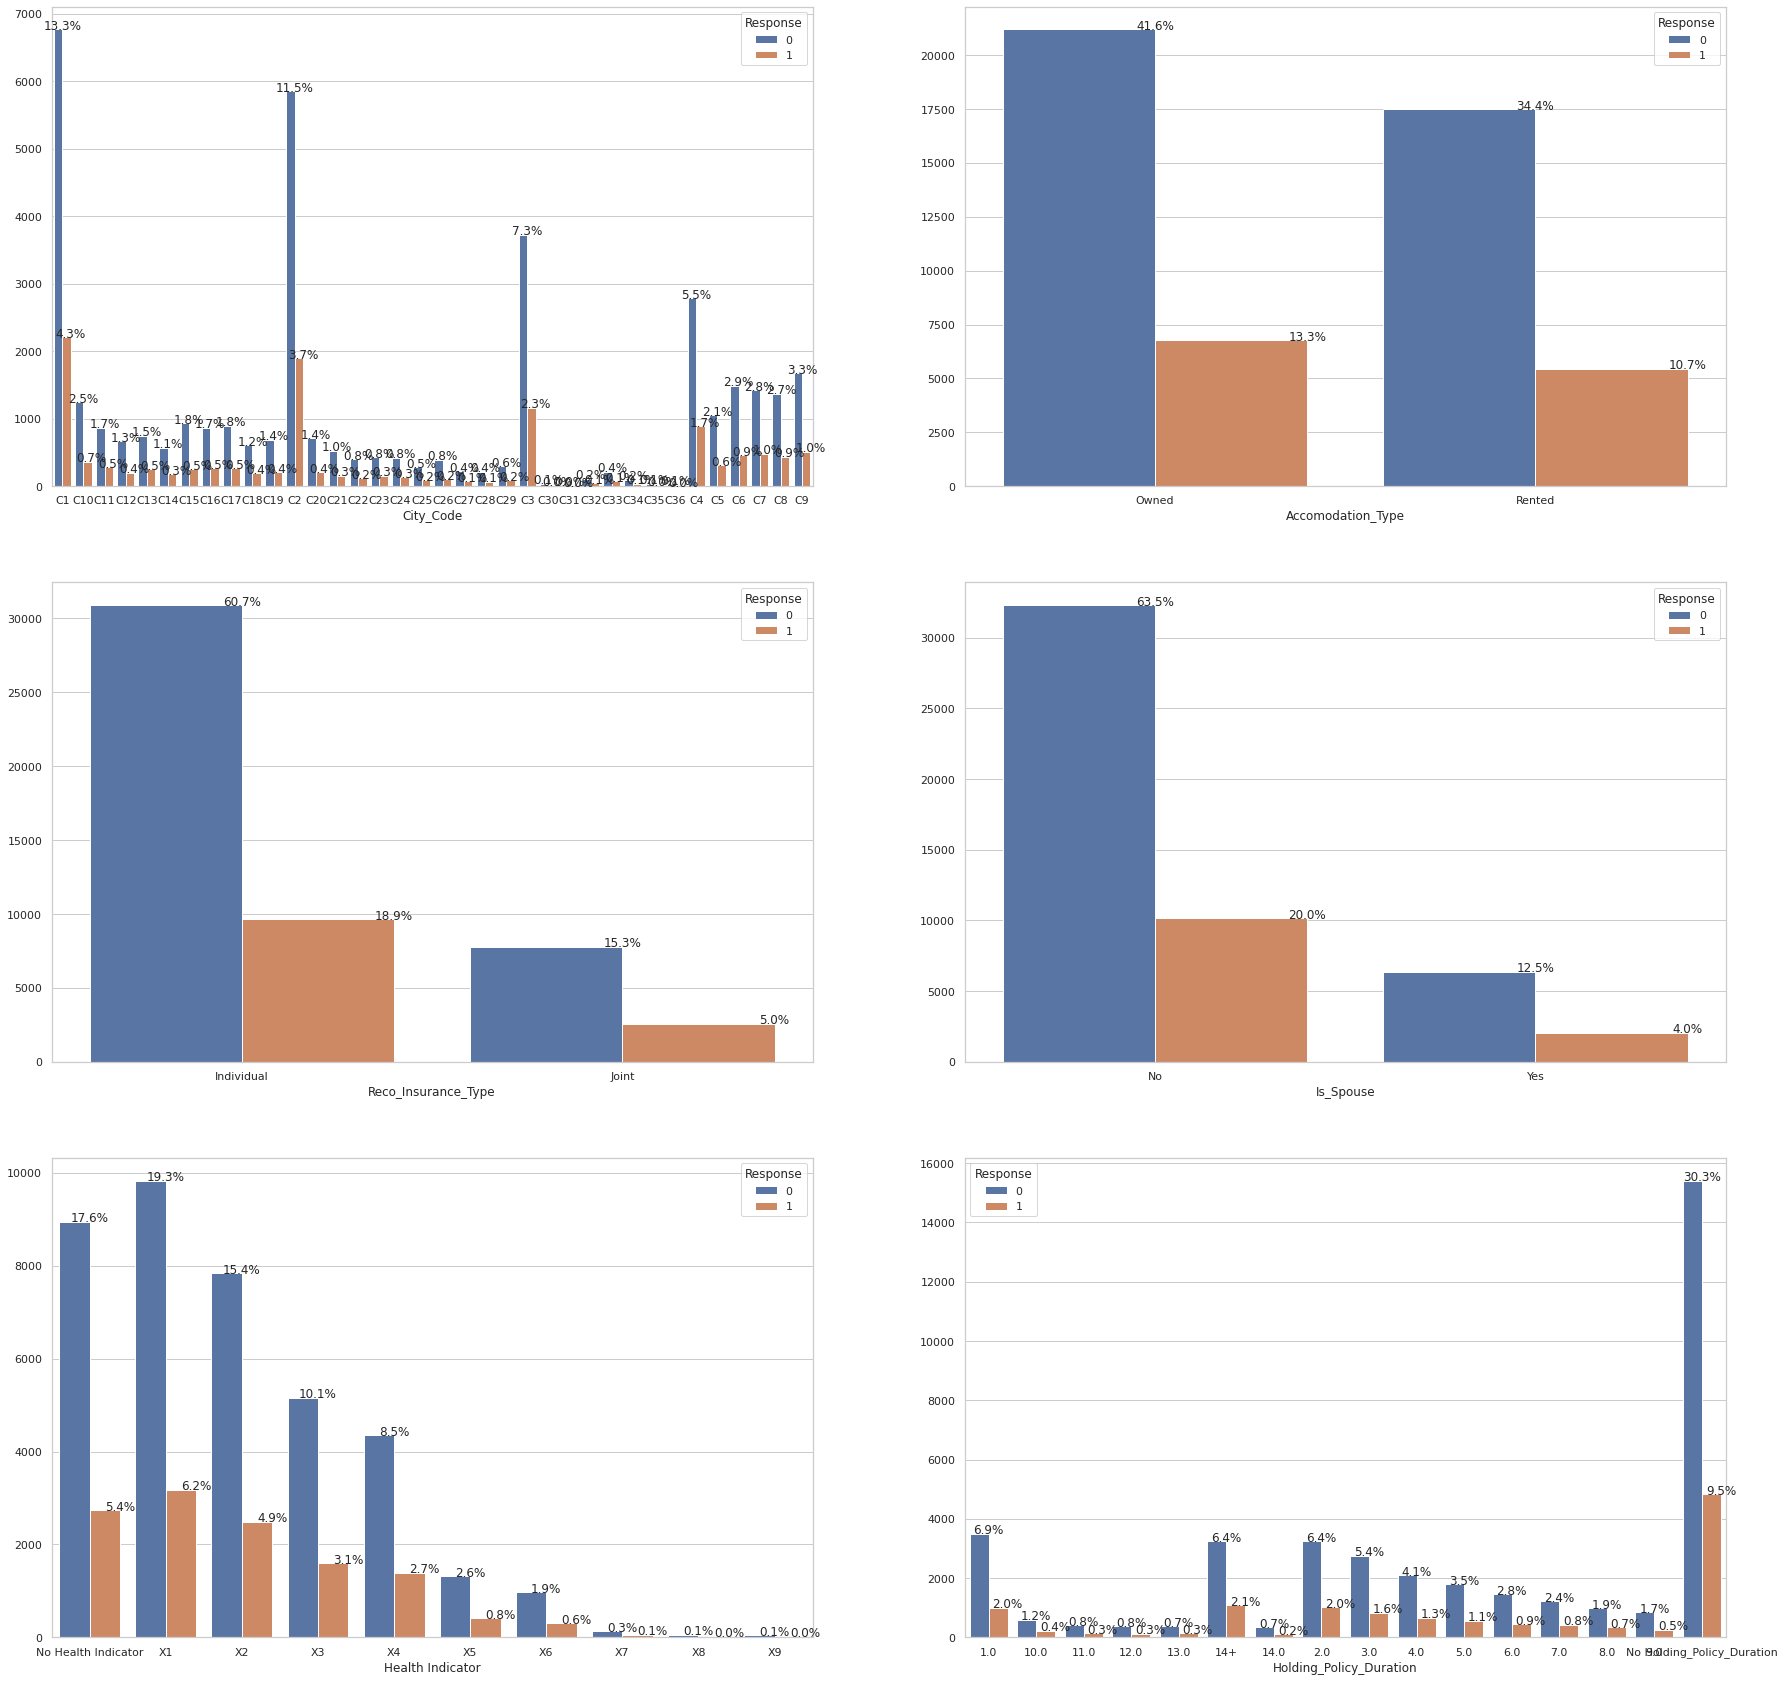

In [ ]:
plt.figure(figsize=(30,30))
total = data_train.shape[0]
for index, category in enumerate(categorical_features_train):
    plt.subplot(3 ,2, index + 1)

    order = sorted(data_train[category].unique())
    ax = sns.countplot(x = category, data=data_train, hue="Response", order=order)
    plt.ylabel('Count')
    ax.set_ylabel('')
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')

    

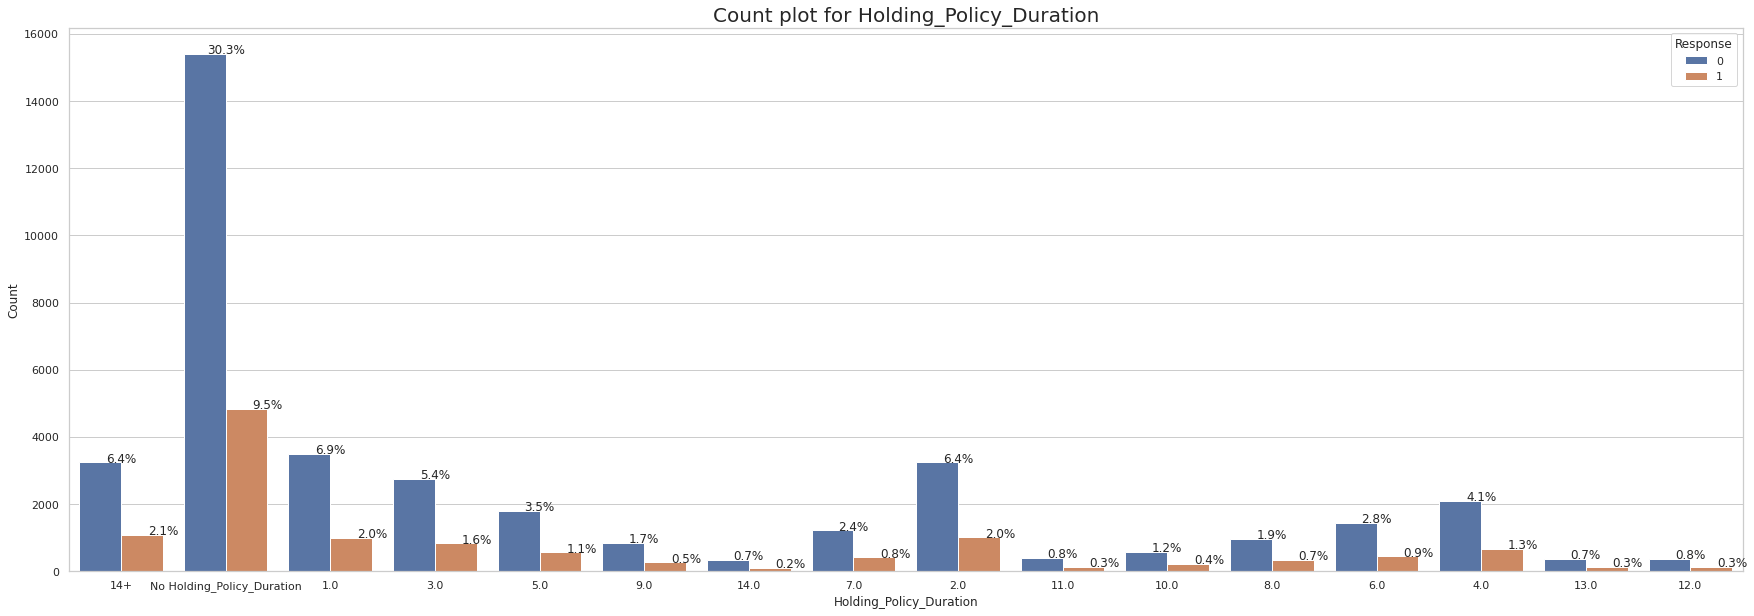

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
ax = sns.countplot(x = 'Holding_Policy_Duration',hue = 'Response',data = data_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center')
  plt.ylabel('Count')
  plt.title('Count plot for Holding_Policy_Duration',fontdict = {'fontsize' : 20})

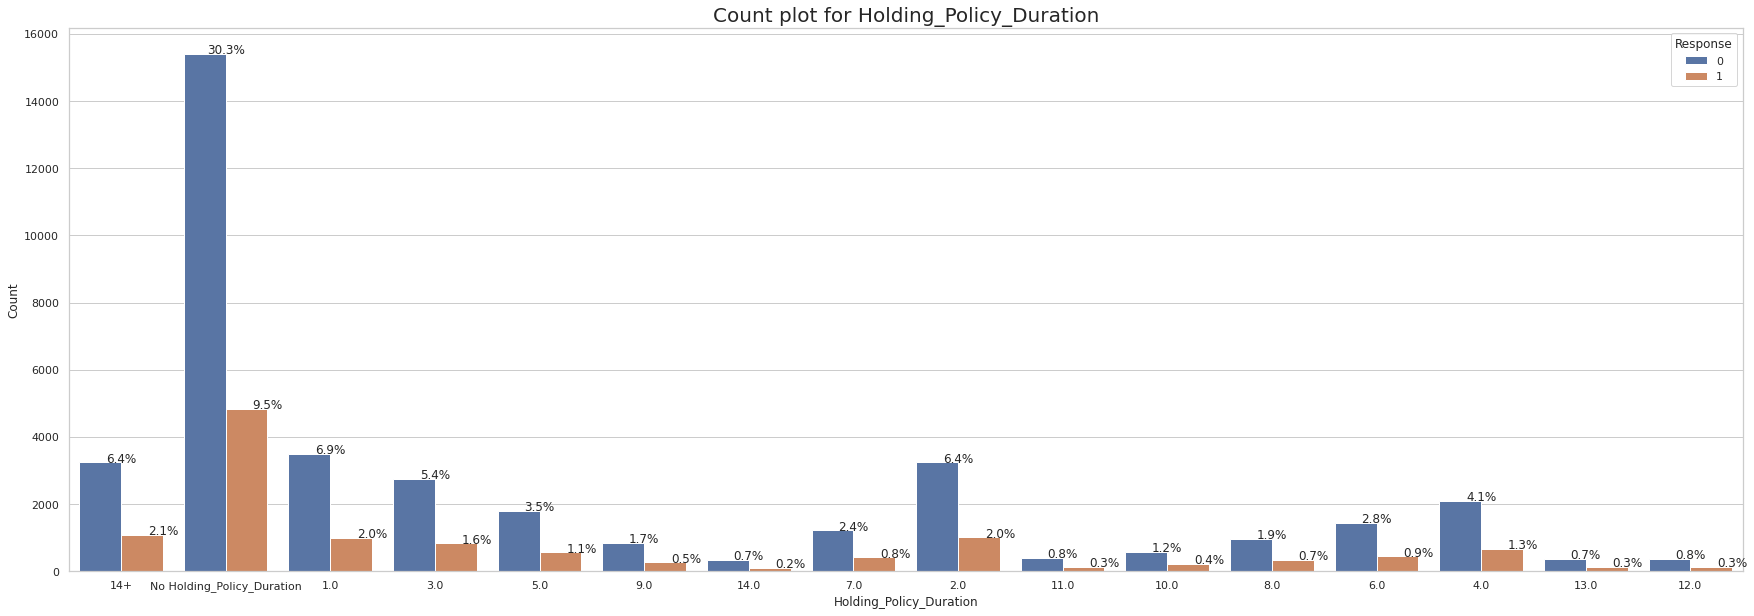

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
ax = sns.countplot(x = 'Holding_Policy_Duration',hue = 'Response',data = data_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center')
  plt.ylabel('Count')
  plt.title('Count plot for Holding_Policy_Duration',fontdict = {'fontsize' : 20})

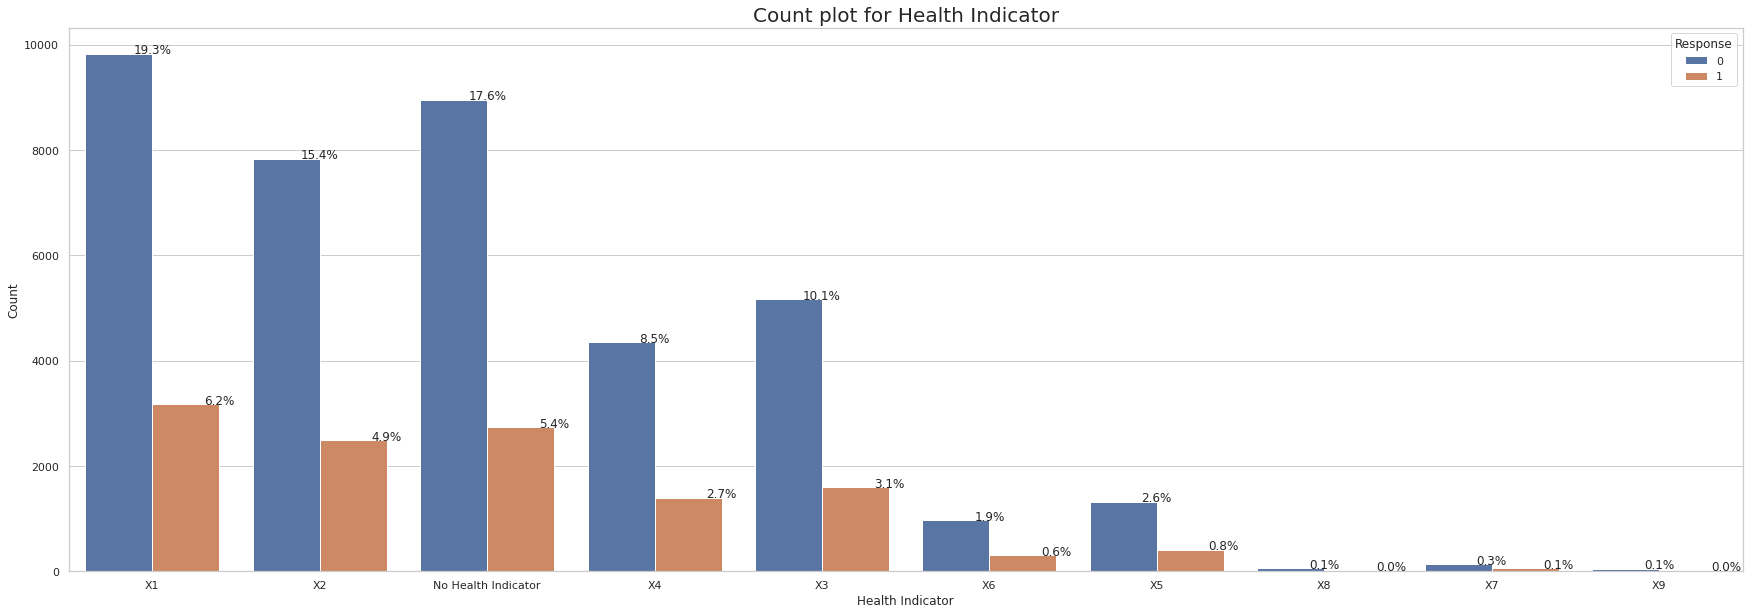

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
ax = sns.countplot(x = 'Health Indicator',hue = 'Response',data = data_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center')
  plt.ylabel('Count')
  plt.title('Count plot for Health Indicator',fontdict = {'fontsize' : 20})

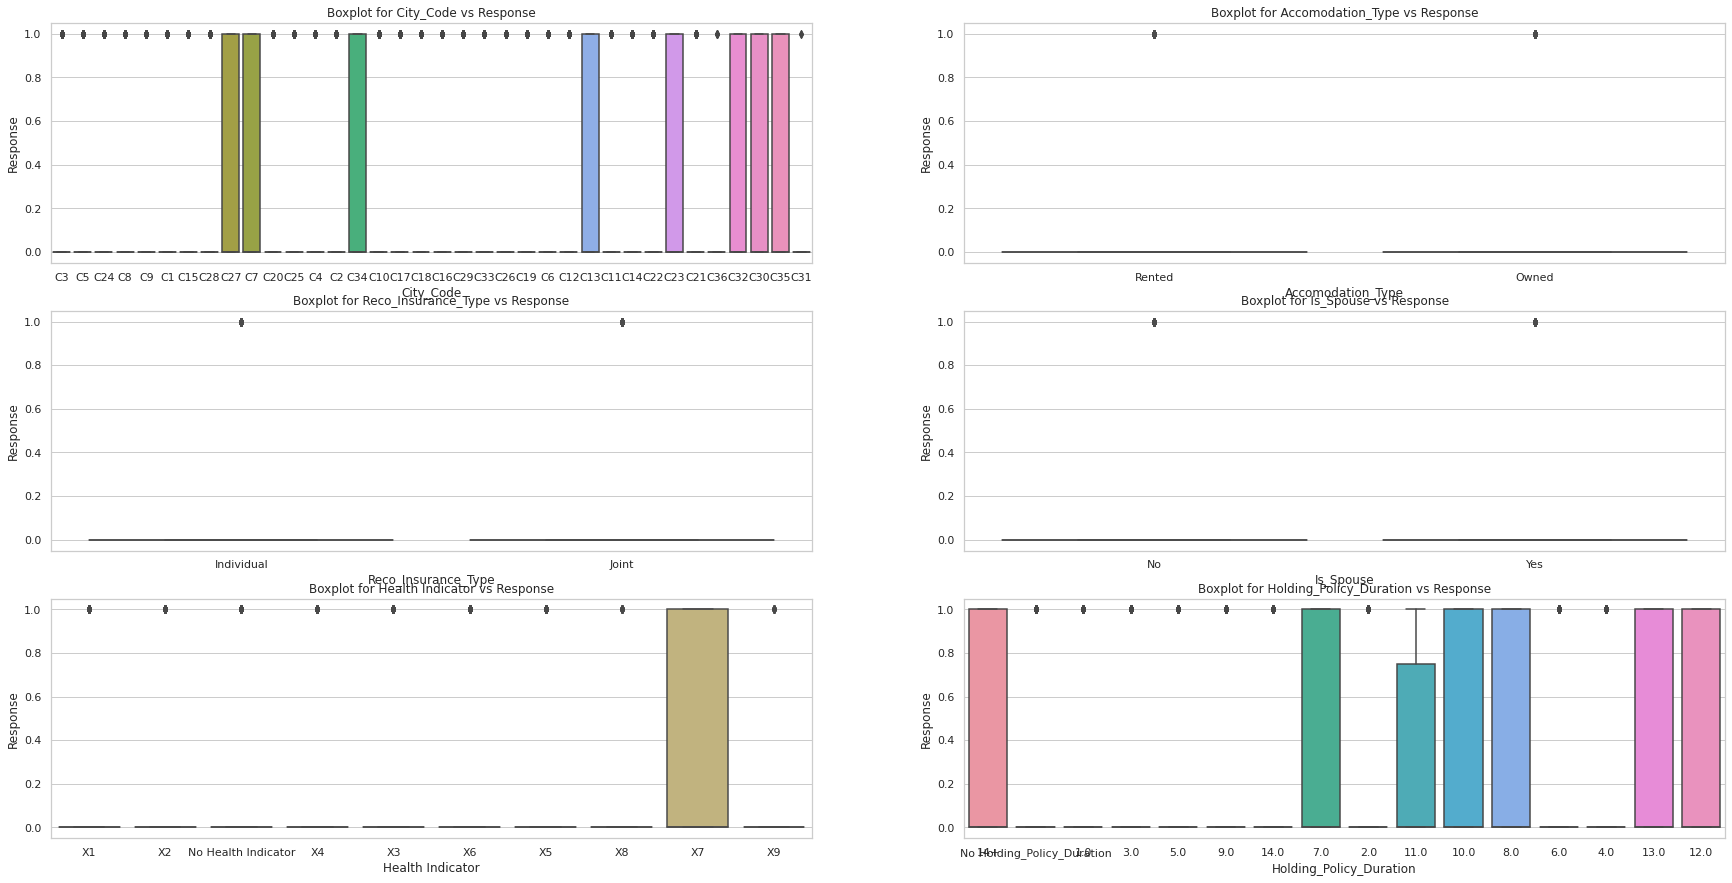

In [ ]:



fig= plt.subplots(figsize=(30,15))

for i,j in enumerate(categorical_features_train):
  plt.subplot(3,2,i+1)
  sns.boxplot(data = data_train,x = j ,y = 'Response')
  plt.title('Boxplot for {} vs Response'.format(j))
  plt.ylabel('Response')

In [ ]:
categorical_features_train

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

# Continuos Variable EDA

In [ ]:
continous_features_train

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

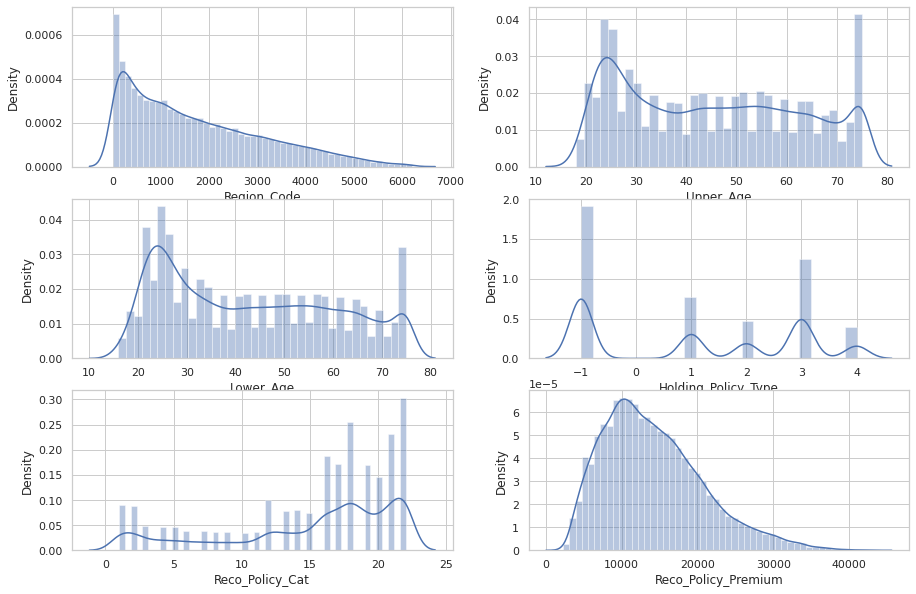

In [ ]:

fig= plt.subplots(figsize=(15,10))

for i,j in enumerate(continous_features_train):
  plt.subplot(3,2,i+1) 
  sns.distplot(data_train[j])

## Reco_policy_premium Analysis :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


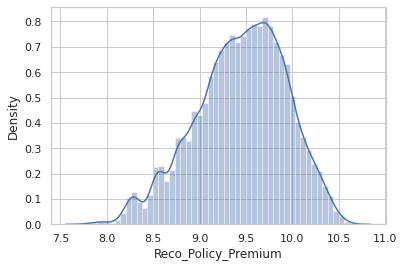

In [ ]:
transf = np.log(data_train.Reco_Policy_Premium)
sns.distplot(transf)

a. sqrt transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


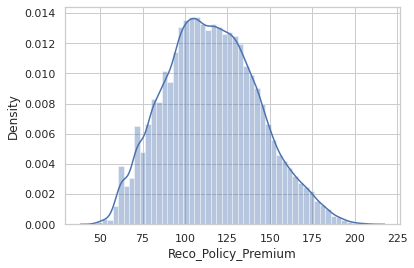

In [ ]:
transf = np.sqrt(data_train.Reco_Policy_Premium)
sns.distplot(transf)

b. Box-Cox transformation:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


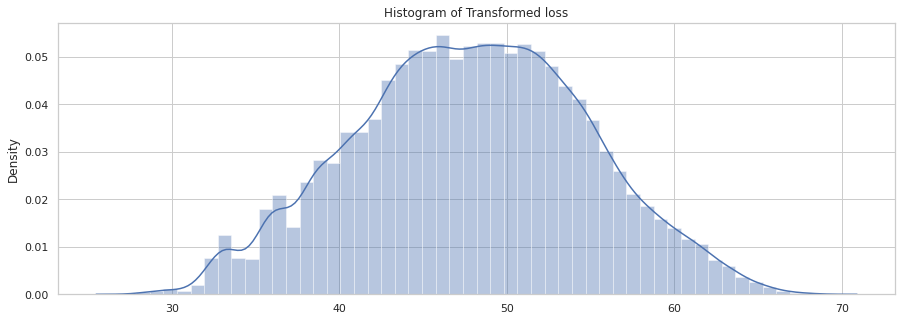

mean :  47.879111682770954
std :  6.946708030252239


In [ ]:
transf, fitted_lambda = stats.boxcox(data_train.Reco_Policy_Premium) 

plt.figure(figsize = (15,5))
sns.distplot(transf )
plt.title('Histogram of Transformed loss')
plt.show()

print('mean : ',transf .mean())
print('std : ', transf .std())

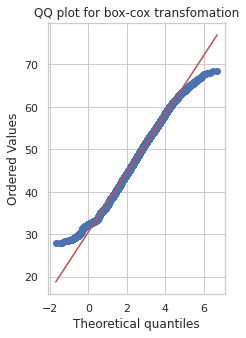

In [ ]:
import pylab

fig= plt.subplots(figsize=(7,5))
#transf = np.log(data_train.Reco_Policy_Premium + 100)
plt.subplot(1,2,1)
stats.probplot(transf, dist = stats.norm,sparams=(2.5,), plot=pylab)
plt.title('QQ plot for box-cox transfomation')
plt.show()

## Upper age and Lower age analysis:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


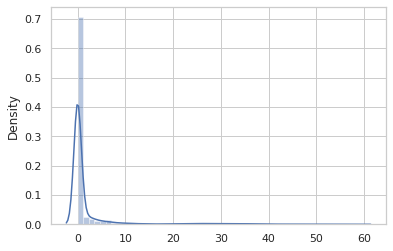

In [ ]:
sub_age = data_train.Upper_Age - data_train.Lower_Age
sns.distplot(sub_age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


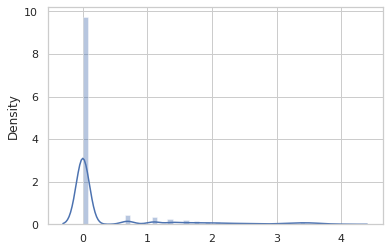

In [ ]:
sub = np.log(sub_age+1)
sns.distplot(sub)

In [ ]:
np.log(sub_age+1).mean(),np.log(sub_age+1).std()
#sns.distplot(np.log(sub_age+10))

(0.3924963027190863, 0.8956531605796926)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


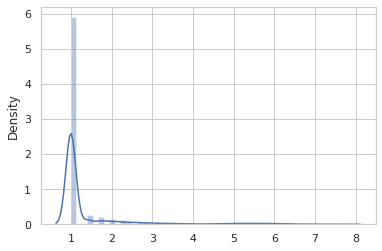

In [ ]:
sns.distplot(np.sqrt(sub_age+1))

In [ ]:
r = np.corrcoef(list(data_train.Response),sub)
r

array([[1.        , 0.01177634],
       [0.01177634, 1.        ]])

In [ ]:
import scipy.stats
scipy.stats.spearmanr(data_train.Response,sub)

SpearmanrResult(correlation=0.010453640466383207, pvalue=0.018371800795092517)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


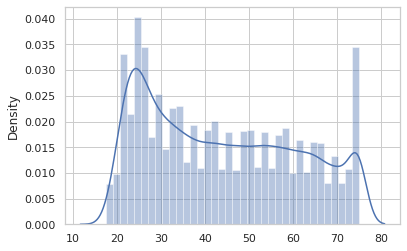

In [ ]:
mean_age = (data_train.Upper_Age + data_train.Lower_Age)/2
sns.distplot(mean_age)

In [ ]:
scipy.stats.spearmanr(data_train.Response,mean_age)

SpearmanrResult(correlation=0.0024476971378209968, pvalue=0.5808693899877677)

In [ ]:
r = np.corrcoef(list(data_train.Lower_Age),sub)
r

array([[ 1.        , -0.11893848],
       [-0.11893848,  1.        ]])

# Box plot for continuos features

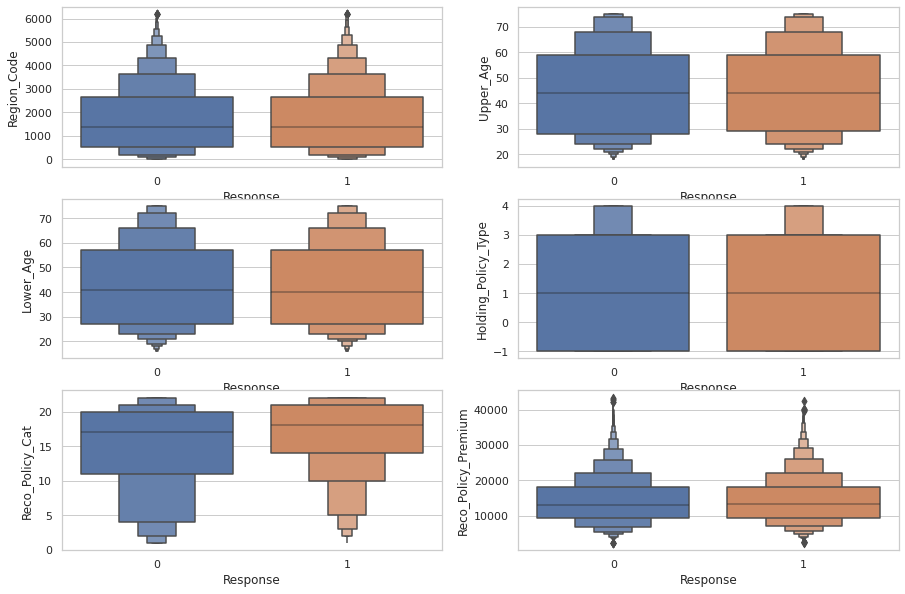

In [ ]:
fig= plt.subplots(figsize=(15,10))
for i,j in enumerate(continous_features_train):
  plt.subplot(3,2,i+1)
  sns.boxenplot(data = data_train , x = 'Response', y = j)

# Bivariate Analysis for Continuous Feature

In [ ]:
continous_features_train

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


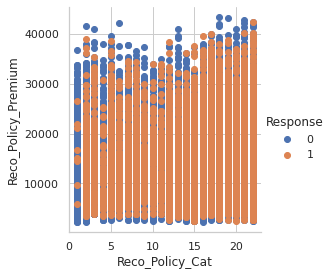

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(data_train, hue="Response", size=4) \
.map(plt.scatter, "Reco_Policy_Cat", "Reco_Policy_Premium") \
   .add_legend();
plt.show();


## pair plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


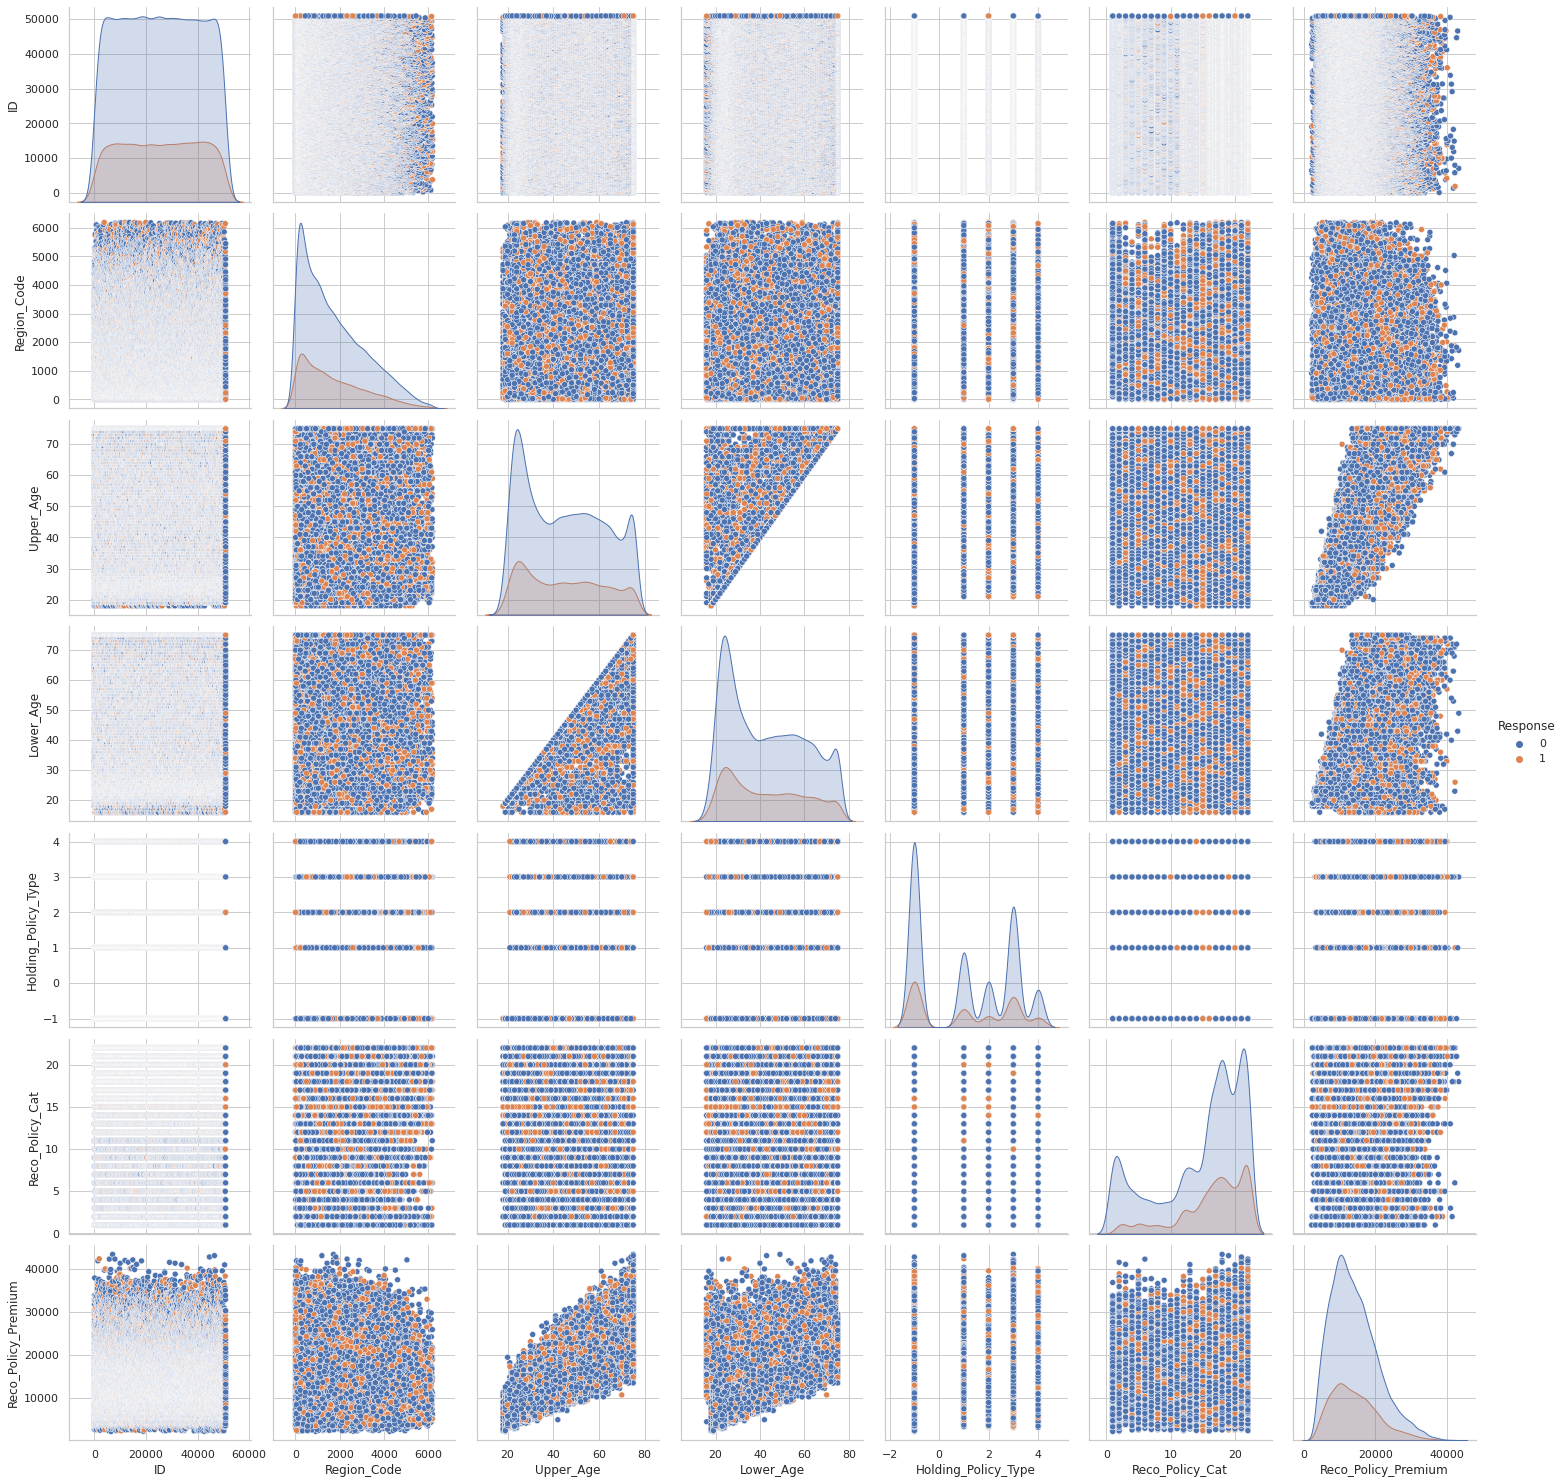

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data_train, hue="Response", size=3);
plt.show()

Text(0.5, 1.0, 'Correlation heatmap')

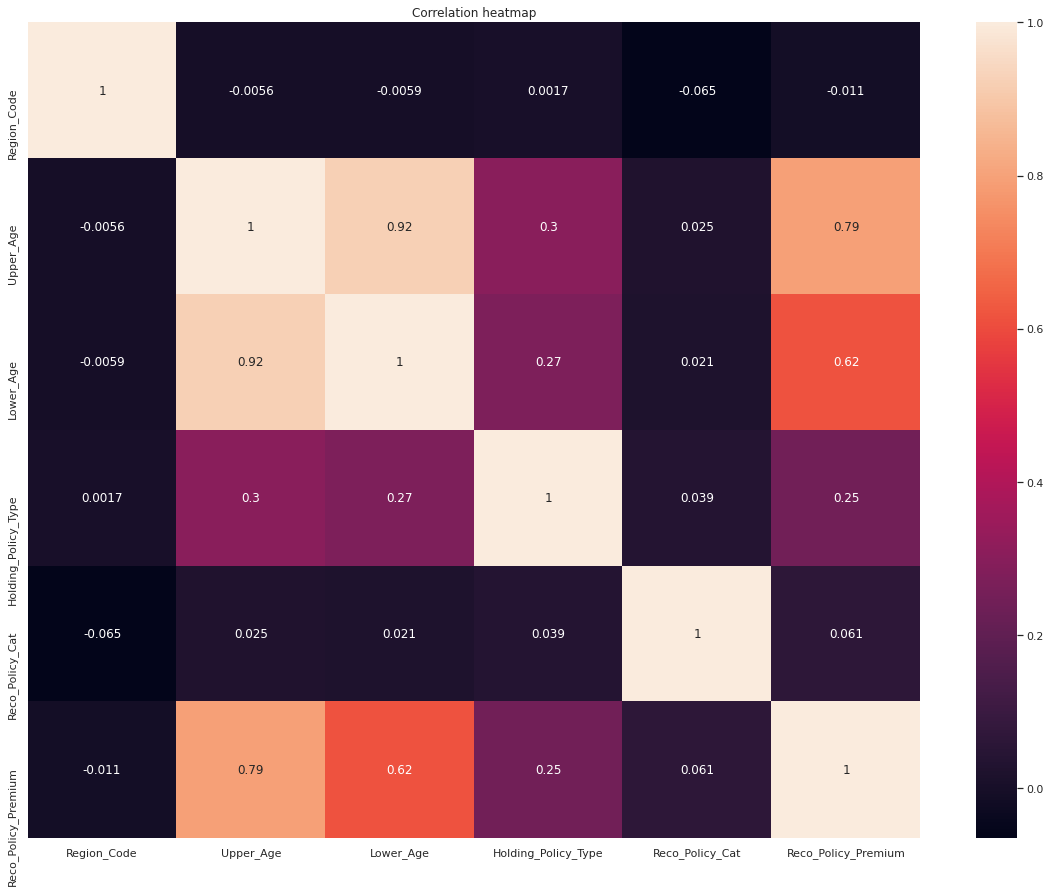

In [ ]:
plt.figure(figsize = (20,15))
correlation = data_train[continous_features_train].corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation heatmap')

Text(0.5, 1.0, 'Correlation heatmap')

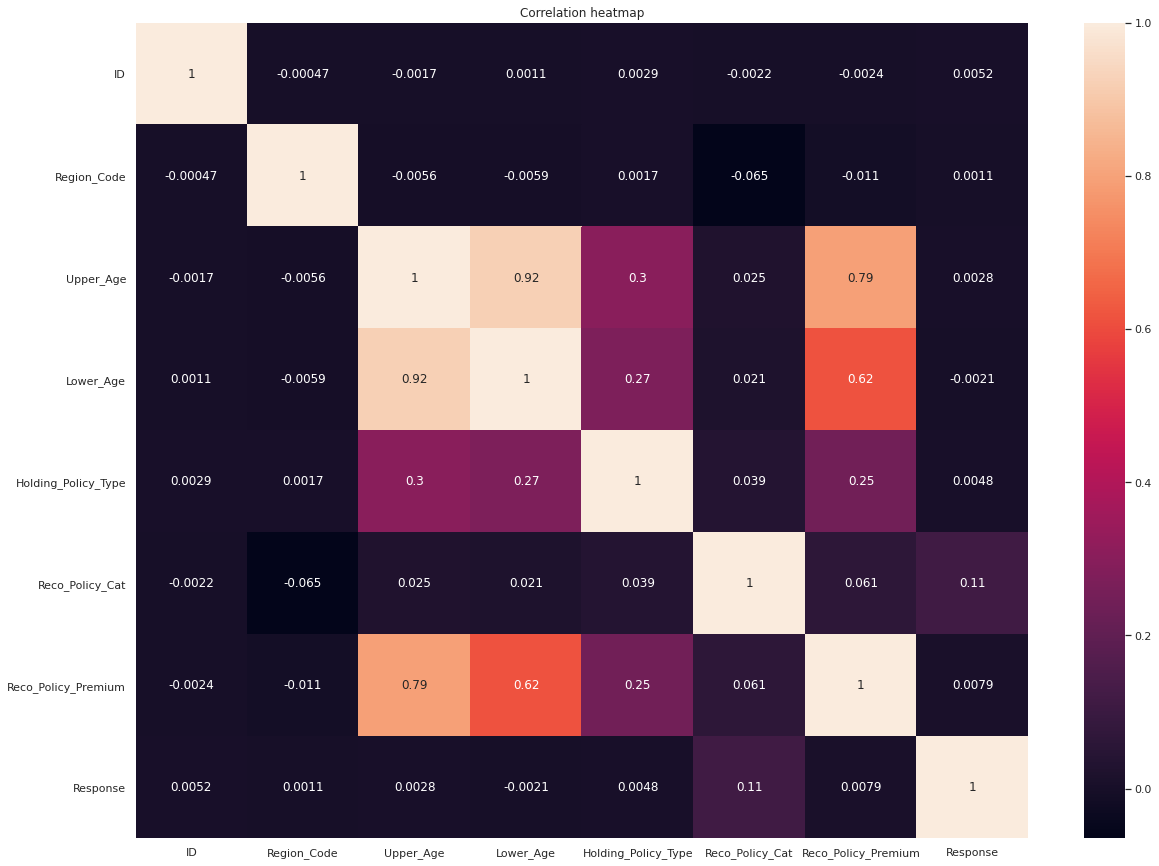

In [ ]:
plt.figure(figsize = (20,15))
correlation = data_train.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation heatmap')

# Check wheather train and test comes from same distribution

In [ ]:
data_test['Health Indicator'].fillna('No Health Indicator',inplace = True)
data_test['Holding_Policy_Duration'].fillna('No Holding_Policy_Duration',inplace = True)
data_test['Holding_Policy_Type'] = data_test['Holding_Policy_Type'].replace(to_replace = np.nan,value = -1)

data_test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [ ]:
train_data_dropped = data_train.drop(['ID','Response'], axis=1)
test_data_dropped  = data_test.drop(['ID'], axis=1)

print('Shape of Train data :',train_data_dropped.shape)
print('Shape of Test  data :',test_data_dropped.shape)

Shape of Train data : (50882, 12)
Shape of Test  data : (21805, 12)


In [ ]:
#Now we create a target variable label for test and train data as 0 , 1 respectively.
train_data_dropped['target'] = 1
test_data_dropped['target'] = 0
final_df = pd.concat((train_data_dropped,test_data_dropped))

In [ ]:
data_label_encode = final_df.copy()
final_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,target
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,1
1,C5,1117,Owned,Joint,75,22,No,X2,No Holding_Policy_Duration,-1.0,22,30510.0,1
2,C5,3732,Owned,Individual,32,32,No,No Health Indicator,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,1
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,1


In [ ]:
for i in categorical_features_train:
  data_label_encode[i] = pd.factorize(data_label_encode[i].values,sort = True)[0]
data_label_encode.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,target
0,22,3213,1,0,36,36,0,1,5,3.0,22,11628.0,1
1,31,1117,0,1,75,22,0,2,15,-1.0,22,30510.0,1
2,31,3732,0,0,32,32,0,0,0,1.0,19,7450.0,1
3,16,4378,0,1,52,48,0,1,5,3.0,19,17780.0,1
4,34,2190,1,0,44,44,0,2,8,1.0,16,10404.0,1


In [ ]:
from sklearn.utils import shuffle
data_label_encode = shuffle(data_label_encode)
data_label_encode.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,target
8696,12,2048,1,0,23,23,0,3,15,-1.0,22,5112.0,0
3377,17,1266,0,1,56,21,1,0,0,1.0,22,26010.0,0
37157,34,2913,0,1,73,70,1,1,5,3.0,1,21673.6,1
10886,3,780,1,0,25,25,0,0,10,3.0,20,11088.0,0
13863,22,3798,1,0,22,22,0,1,15,-1.0,9,11808.0,1


In [ ]:
X = data_label_encode.drop(['target'],axis = 1)
y = data_label_encode.target

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.3)

print('shape of x_train : ',X_train.shape)
print('shape of y_train : ',y_train.shape)
print('shape of x_test  : ',X_test.shape)
print('shape of y_test  : ',y_test.shape)

shape of x_train :  (50880, 12)
shape of y_train :  (50880,)
shape of x_test  :  (21807, 12)
shape of y_test  :  (21807,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)
predicted_value = model.predict(X_test)
acc = accuracy_score(y_test, predicted_value)
auc = roc_auc_score(y_test, predicted_value)
print("Random Forest Accuracy: {:.2%}".format(acc))
print("Random Forest AUC: {:.2%}".format(auc))

Random Forest Accuracy: 68.82%
Random Forest AUC: 49.99%


Accuracy and AUC are low means train and test set comes from same distributon:

<function matplotlib.pyplot.show>

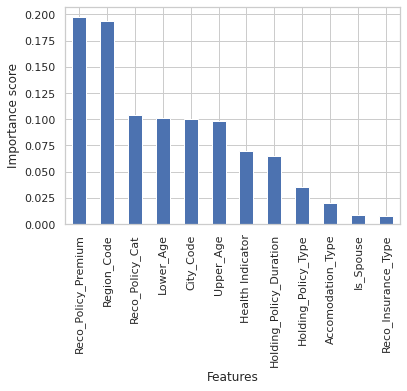

In [ ]:
ranked_feature_combine = pd.Series(model.feature_importances_,index = X.columns)
ranked_feature_combine.nlargest(20).plot(kind = 'bar')
plt.ylabel('Importance score')
plt.xlabel('Features')
plt.show